In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

dtype: uint8
dtype: (298, 299)


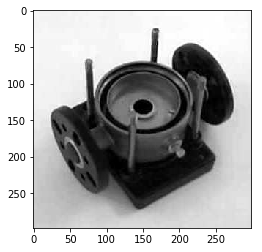

In [28]:
input_image=cv2.imread('wheel.png',cv2.IMREAD_GRAYSCALE)
print('dtype: ' + str(input_image.dtype))
print('dtype: ' + str(input_image.shape))
plt.imshow(input_image,cmap='gray')

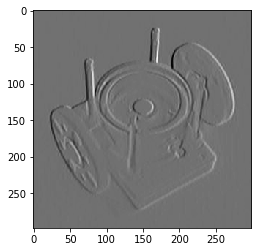

In [29]:
ddepth=cv2.CV_64F
dx=1
dy=0
sobelx=cv2.Sobel(input_image,ddepth,dx,dy)
plt.imshow(sobelx,cmap='gray')

In [30]:
#sobel opertaions


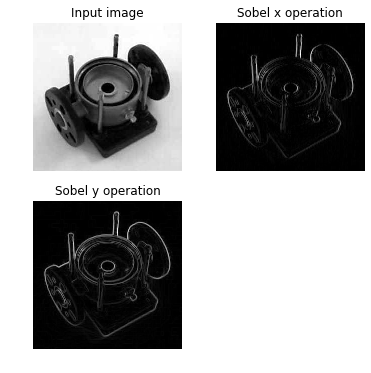

In [31]:
sobelx=cv2.Sobel(input_image,cv2.CV_64F,1,0)
sobely=cv2.Sobel(input_image,cv2.CV_64F,0,1)
sobel=cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx,2.0),1.0,cv2.pow(sobely,2.0),1.0,0.0))
plt.figure(figsize=(6,6));
plt.subplot(2,2,1);plt.title('Input image');plt.axis('off');
plt.imshow(input_image,cmap='gray');
plt.subplot(2,2,2);plt.title('Sobel x operation');
plt.axis('off');
plt.imshow(cv2.absdiff(sobelx,0.0),cmap='gray')
plt.subplot(2,2,3);plt.title('Sobel y operation');
plt.axis('off');
plt.imshow(sobel,cmap='gray')

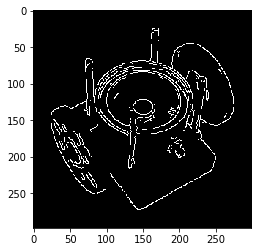

In [32]:
#canny edge detection

threshold1=100
threshold2=200
canny=cv2.Canny(input_image, threshold1, threshold2)
plt.imshow(canny,cmap='gray')

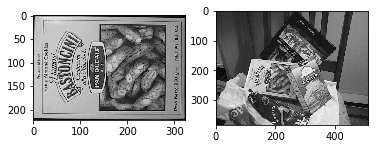

In [33]:
#open and show images
img1=cv2.imread('box.png')
img2=cv2.imread('box_in_scene.png')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [34]:
#SIFT feature extracting
import time
sift=cv2.SIFT()
sift=cv2.xfeatures2d.SIFT_create()
gray1=cv2.cvtColor(img1,cv2.COLOR_BRG2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BRG2GRAY)
start_time=time.time()
kp1,des1=sift.detectAndCompute(gray1, None)
kp2,des2=sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' %(time.time()-start_time))
print('Image 1-%d feature detected' %des1.shape[0])
print('Image 2-%d feature detected' %des2.shape[0])

AttributeError: module 'cv2.cv2' has no attribute 'SIFT'

In [ ]:
#APPLY ratio test as in David Rowe's paper
good_matches=[]
for m, n in matches:
    if m.distance<0.75*n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

In [ ]:
img3=cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

In [ ]:
#BFmatcher(brute force matcher)
bf=cv2.BFMatcher(cv2.NORM_L2)
matches=bf.
atch(des1,des2,k=2)
print('%d matches'% len(matches))

In [ ]:
#inspect matcher results
print type(matches)
print len